In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("/content/train.csv")
data

id  ... label
0          0  ...     1
1          1  ...     0
2          2  ...     1
3          3  ...     1
4          4  ...     1
...      ...  ...   ...
20795  20795  ...     0
20796  20796  ...     0
20797  20797  ...     0
20798  20798  ...     1
20799  20799  ...     1

[20800 rows x 5 columns]

In [7]:
X = data.drop("label", axis=1)
X.head()

id  ...                                               text
0   0  ...  House Dem Aide: We Didn’t Even See Comey’s Let...
1   1  ...  Ever get the feeling your life circles the rou...
2   2  ...  Why the Truth Might Get You Fired October 29, ...
3   3  ...  Videos 15 Civilians Killed In Single US Airstr...
4   4  ...  Print \nAn Iranian woman has been sentenced to...

[5 rows x 4 columns]

In [9]:
y = data["label"]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [10]:
data.shape

(20800, 5)

In [12]:
## Droping the NA Values from the dataset

data = data.dropna()
data.shape

(18285, 5)

In [13]:
## CountVectorizer is Bagofwords which will convert the text into vectorized format. 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [14]:
messages = data.copy()

In [15]:
messages.shape

(18285, 5)

In [16]:
messages.reset_index(inplace=True)

In [17]:
messages.head()

index  id  ...                                               text label
0      0   0  ...  House Dem Aide: We Didn’t Even See Comey’s Let...     1
1      1   1  ...  Ever get the feeling your life circles the rou...     0
2      2   2  ...  Why the Truth Might Get You Fired October 29, ...     1
3      3   3  ...  Videos 15 Civilians Killed In Single US Airstr...     1
4      4   4  ...  Print \nAn Iranian woman has been sentenced to...     1

[5 rows x 6 columns]

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [22]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [24]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know anthoni weiner sext teenag appar littl thing fact matter c

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [26]:
X.shape

(18285, 5000)

In [29]:
y = messages['label']
y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64

In [32]:
## Dividing the dataset into the Train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [34]:
cv.get_feature_names()

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access',
 'access pipelin',
 'accid',
 'accommod',
 'accompani',
 'accomplish',
 'accord',
 'accord report',
 'account',
 'accumul',
 'accur',
 'accus',
 'achiev',
 'acid',
 'acknowledg',
 'acquir',
 'acr',
 'across',
 'across countri',
 'act',
 'action',
 'activ',
 'activist',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adapt',
 'add',
 'addict',
 'addit',
 'address',
 'adjust',
 'administr',
 'administr offici',
 'admir',
 'admiss',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advantag',
 'adventur',
 'adversari',
 'advertis',
 'advic',
 'advis',
 'advisor',
 'advisori',
 'advoc',
 'advocaci',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afford care',
 'afford care act',
 'afghan',
 'afghanistan',
 'afraid',
 'africa',
 'african',
 'african american',
 'aftermath',
 'aftern

In [40]:

cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [36]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [37]:
count_df.head()

aaron  abandon  abc  abe  abedin  ...  zero  zika  zionist  zone  zu
0      0        0    0    0       0  ...     0     0        0     0   0
1      0        0    0    0       0  ...     1     0        0     1   0
2      0        0    0    0       0  ...     0     0        0     0   0
3      0        0    0    0       0  ...     0     0        0     0   0
4      0        0    0    0       0  ...     0     0        0     0   0

[5 rows x 5000 columns]

In [38]:
import matplotlib.pyplot as plt

In [39]:
## Confusion Matrix Representation in Matplotlib.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Multinominal-NB Algorithm

In [41]:
## Applying Naive Bayes Algorithm
# For textual Data, Naive Bayes algorithm performs well when compared to the other machine learning algorithms
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [42]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.897
Confusion matrix, without normalization


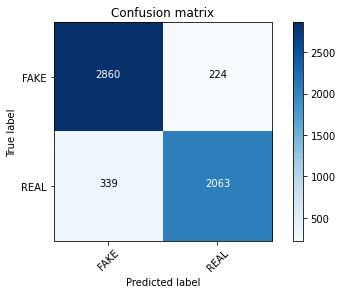

In [43]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [44]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8973751367116296

In [45]:
y_train.shape

(12799,)

# Passive Aggressive Classifier Algorithm

In [47]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.937
Confusion matrix, without normalization


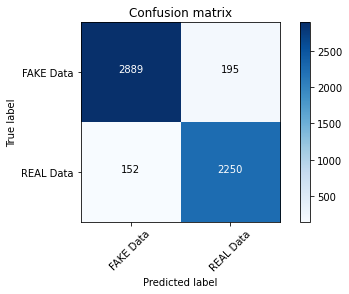

In [48]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

# Hyper-parameter Tunning

In [50]:
## here alpha is a hyper-parameter
classifier = MultinomialNB(alpha=0.1)


In [51]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8984688297484505
Alpha: 0.1, Score : 0.8979219832300401
Alpha: 0.2, Score : 0.8975574188844331
Alpha: 0.30000000000000004, Score : 0.8975574188844331
Alpha: 0.4, Score : 0.8973751367116296
Alpha: 0.5, Score : 0.8973751367116296
Alpha: 0.6000000000000001, Score : 0.8973751367116296
Alpha: 0.7000000000000001, Score : 0.8973751367116296
Alpha: 0.8, Score : 0.8973751367116296
Alpha: 0.9, Score : 0.8973751367116296


In [52]:
## Get Features names
feature_names = cv.get_feature_names()

In [53]:
classifier.coef_[0]

array([-10.62637465,  -9.13253666,  -9.24918343, ...,  -9.02808608,
        -8.26399307,  -9.23848242])

In [54]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.0730267192674425, 'trump'),
 (-5.086165218076301, 'clinton'),
 (-5.254309567137579, 'peopl'),
 (-5.261365567154835, 'one'),
 (-5.327108908116028, 'state'),
 (-5.399654062082163, 'us'),
 (-5.405972726549772, 'would'),
 (-5.519989913061179, 'like'),
 (-5.527770136178576, 'hillari'),
 (-5.551880705455197, 'time'),
 (-5.63484031255738, 'elect'),
 (-5.638469079566585, 'year'),
 (-5.691011421153368, 'said'),
 (-5.704900747662386, 'american'),
 (-5.76924348072904, 'new'),
 (-5.812769841947382, 'also'),
 (-5.816064223676383, 'use'),
 (-5.825837595943563, 'presid'),
 (-5.846749591583928, 'world'),
 (-5.853397835426348, 'go')]

In [55]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-14.579752843214152, 'brief post'),
 (-14.579752843214152, 'follow pam'),
 (-14.579752843214152, 'follow pam key'),
 (-14.579752843214152, 'gold medal'),
 (-14.579752843214152, 'gorsuch'),
 (-14.579752843214152, 'judg gorsuch'),
 (-14.579752843214152, 'key twitter'),
 (-14.579752843214152, 'key twitter pamkeynen'),
 (-14.579752843214152, 'morn brief'),
 (-14.579752843214152, 'mr ail'),
 (-14.579752843214152, 'mr bannon'),
 (-14.579752843214152, 'mr castro'),
 (-14.579752843214152, 'mr christi'),
 (-14.579752843214152, 'mr cruz'),
 (-14.579752843214152, 'mr de'),
 (-14.579752843214152, 'mr flynn'),
 (-14.579752843214152, 'mr kushner'),
 (-14.579752843214152, 'mr roof'),
 (-14.579752843214152, 'mr sander'),
 (-14.579752843214152, 'mr scott'),
 (-14.579752843214152, 'mr session'),
 (-14.579752843214152, 'mr spicer'),
 (-14.579752843214152, 'mr xi'),
 (-14.579752843214152, 'ms trump'),
 (-14.579752843214152, 'pam key'),
 (-14.579752843214152, 'pam key twitter'),
 (-14.579752843214152, 'p

# Using TFIDF

In [56]:
data1 = pd.read_csv("/content/train.csv")


In [57]:
data1.head()

id  ... label
0   0  ...     1
1   1  ...     0
2   2  ...     1
3   3  ...     1
4   4  ...     1

[5 rows x 5 columns]

In [63]:
# Creating the independent and dependent features
X = data1.drop("label", axis=1)
y = data1["label"]

In [64]:
X.head()

id  ...                                               text
0   0  ...  House Dem Aide: We Didn’t Even See Comey’s Let...
1   1  ...  Ever get the feeling your life circles the rou...
2   2  ...  Why the Truth Might Get You Fired October 29, ...
3   3  ...  Videos 15 Civilians Killed In Single US Airstr...
4   4  ...  Print \nAn Iranian woman has been sentenced to...

[5 rows x 4 columns]

In [65]:
X.shape

(20800, 4)

In [67]:
# Droping the NA values
data1 = data1.dropna()

In [68]:
data1.shape

(18285, 5)

In [70]:
messages1 = data1.copy()

In [71]:
messages1.reset_index(inplace=True)

In [74]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know anthoni weiner sext teenag appar littl thing fact matter c

In [75]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [76]:
X.shape

(18285, 5000)

In [77]:
y=messages['label']

In [78]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [79]:
tfidf_v.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [80]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [81]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [82]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## MultinomialNB Algorithm

In [83]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [84]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.900
Confusion matrix, without normalization


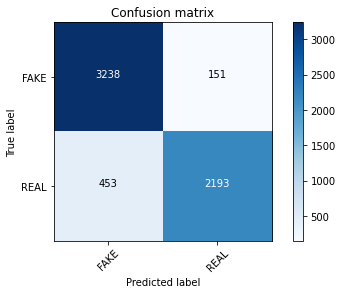

In [85]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [86]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.899917149958575

In [87]:
y_train.shape

(12250,)

In [88]:
classifier=MultinomialNB(alpha=0.1)

In [89]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.9022369511184756
Alpha: 0.1, Score : 0.9017398508699255
Alpha: 0.2, Score : 0.9020712510356255
Alpha: 0.30000000000000004, Score : 0.9022369511184756
Alpha: 0.4, Score : 0.9020712510356255
Alpha: 0.5, Score : 0.9014084507042254
Alpha: 0.6000000000000001, Score : 0.9015741507870754
Alpha: 0.7000000000000001, Score : 0.9012427506213753
Alpha: 0.8, Score : 0.9009113504556753
Alpha: 0.9, Score : 0.9005799502899752


In [90]:
# Get Features names
feature_names = cv.get_feature_names()

In [91]:
classifier.coef_[0]


array([-9.52147382, -8.98567005, -8.75019038, ..., -9.00768675,
       -8.29304531, -8.47560634])

In [92]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.400573176146374, 'clinton'),
 (-5.504449523154856, 'trump'),
 (-5.689699395630465, 'hillari'),
 (-5.927658316663332, 'us'),
 (-5.943924155634382, 'elect'),
 (-6.141141898356725, 'peopl'),
 (-6.153679149791046, 'vote'),
 (-6.1855372689534684, 'state'),
 (-6.209385038898738, 'email'),
 (-6.231070569259119, 'one'),
 (-6.304754452471091, 'hillari clinton'),
 (-6.30763946084777, 'fbi'),
 (-6.325864550609382, 'would'),
 (-6.334934576217139, 'like'),
 (-6.373788650596871, 'american'),
 (-6.392869520601681, 'time'),
 (-6.398029580588211, 'war'),
 (-6.415258514684247, 'world'),
 (-6.450564452209334, 'year'),
 (-6.459455119306126, 'octob')]

In [93]:

### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.991740188222842, 'brief post'),
 (-10.991740188222842, 'follow pam'),
 (-10.991740188222842, 'follow pam key'),
 (-10.991740188222842, 'gold medal'),
 (-10.991740188222842, 'gorsuch'),
 (-10.991740188222842, 'judg gorsuch'),
 (-10.991740188222842, 'key twitter'),
 (-10.991740188222842, 'key twitter pamkeynen'),
 (-10.991740188222842, 'morn brief'),
 (-10.991740188222842, 'mr ail'),
 (-10.991740188222842, 'mr bannon'),
 (-10.991740188222842, 'mr castro'),
 (-10.991740188222842, 'mr christi'),
 (-10.991740188222842, 'mr cruz'),
 (-10.991740188222842, 'mr de'),
 (-10.991740188222842, 'mr flynn'),
 (-10.991740188222842, 'mr kushner'),
 (-10.991740188222842, 'mr roof'),
 (-10.991740188222842, 'mr sander'),
 (-10.991740188222842, 'mr scott'),
 (-10.991740188222842, 'mr session'),
 (-10.991740188222842, 'mr spicer'),
 (-10.991740188222842, 'mr xi'),
 (-10.991740188222842, 'ms trump'),
 (-10.991740188222842, 'pam key'),
 (-10.991740188222842, 'pam key twitter'),
 (-10.991740188222842, 'p